In [1]:
from torchvision import datasets, transforms
from utils import dataset_loader, plot_loss_accuracy, evaluate_model, plot_grid_view, plot_cmatrix_creport
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
    print(device)

cpu


In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*30*30, 128)
        self.fc2 = nn.Linear(128, 8)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x =self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*30*30)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
def train_cnn(criterion, optimizer, net, epochs_no, device, train_loader, val_loader):
    epochs = epochs_no

    epoch_log = []
    loss_log = []
    accuracy_log = []

    for epoch in range(epochs):
        print(f'Starting Epoch: {epoch+1}...')
        
        running_loss = 0.0
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 50 ==49:
                correct = 0
                total = 0
                
                with torch.no_grad():
                    for data in val_loader:
                        images, labels = data
                        images = images.to(device)
                        labels = labels.to(device)
                        
                        outputs = net(images)
                        
                        _, predicted = torch.max(outputs.data, dim=1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                        
                    accuracy = 100 * correct / total
                    epoch_num = epoch + 1
                    actual_loss = running_loss / 50
                    print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i +1)}, loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                    running_loss = 0.0
                
        epoch_log.append(epoch_num)
        loss_log.append(actual_loss)
        accuracy_log.append(accuracy)
        
    print('Finished Training')
    return epoch_log, loss_log, accuracy_log
        

In [15]:
dataset_dir = '../output'
batch_size = 128

# Apply transformations
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Initiate dataloaders
dataset, train_loader, val_loader, test_loader = dataset_loader(
    dataset_dir, transform, batch_size=batch_size
)

In [18]:
# Hyperparameters
lr = 0.003
epochs_no = 20

# Create an instance of the model
net = Net()
net.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr= lr)

# Training..
epoch_log, loss_log, accuracy_log = train_cnn(criterion, optimizer, net, epochs_no, device, train_loader, val_loader)

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, loss: 1.897, Test Accuracy = 67.837%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, loss: 0.694, Test Accuracy = 76.568%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, loss: 0.505, Test Accuracy = 80.432%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, loss: 0.373, Test Accuracy = 80.783%
Starting Epoch: 5...
Epoch: 5, Mini-Batches Completed: 50, loss: 0.271, Test Accuracy = 80.733%
Starting Epoch: 6...
Epoch: 6, Mini-Batches Completed: 50, loss: 0.193, Test Accuracy = 81.887%
Starting Epoch: 7...
Epoch: 7, Mini-Batches Completed: 50, loss: 0.123, Test Accuracy = 81.184%
Starting Epoch: 8...
Epoch: 8, Mini-Batches Completed: 50, loss: 0.079, Test Accuracy = 81.836%
Starting Epoch: 9...
Epoch: 9, Mini-Batches Completed: 50, loss: 0.042, Test Accuracy = 81.937%
Starting Epoch: 10...
Epoch: 10, Mini-Batches Completed: 50, loss: 0.022, Test Accuracy = 81.535%
Starting Epoch: 11...
Epoch: 11, Mini-

In [20]:
# Save model
PATH = '../models/net_base_model.pth'
torch.save(net.state_dict(), PATH)

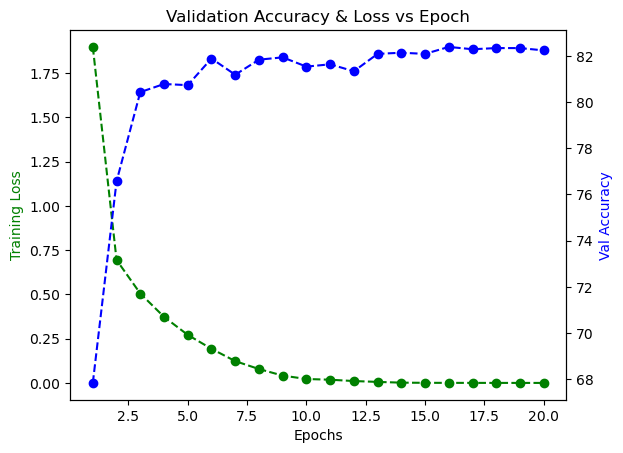

In [21]:
# Plot loss and accuracy
plot_loss_accuracy(epoch_log, loss_log, accuracy_log)

In [23]:
# Evalaute on test set
evaluate_model(test_loader,net)

'Test Accuracy: 80.561%'

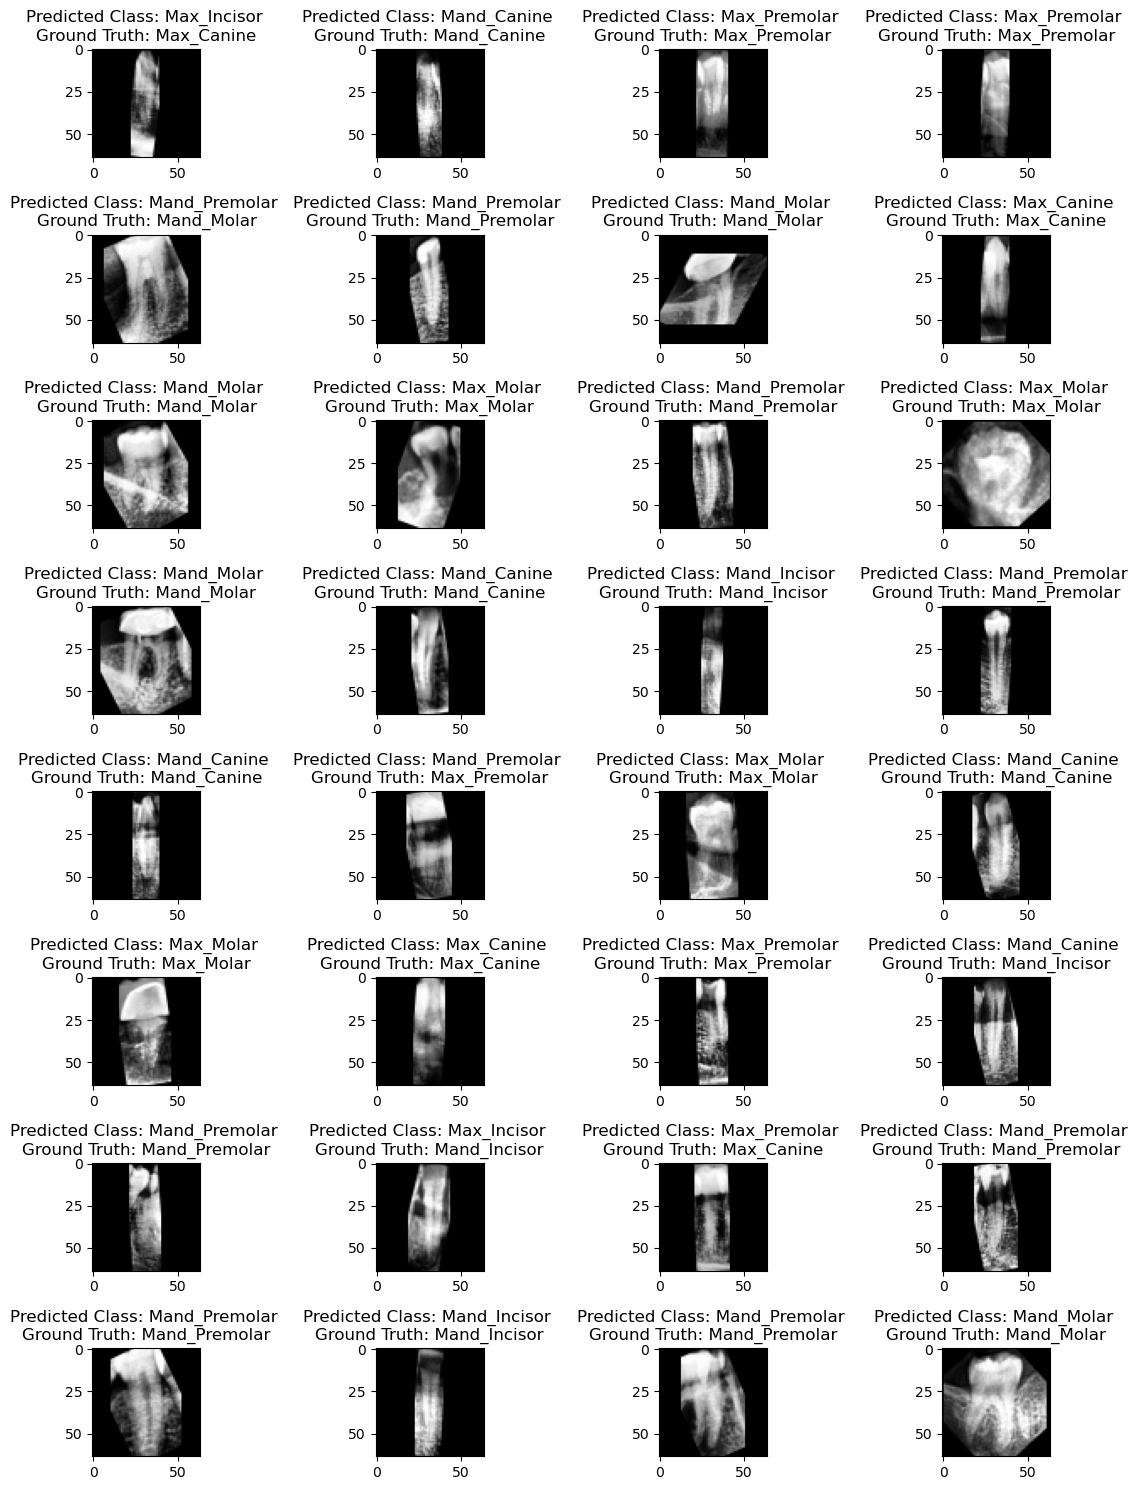

In [24]:
plot_grid_view(dataset, net, test_loader)

In [26]:
# Load a trained model
net = Net()
net.to(device)
net.load_state_dict(torch.load(r'..\models\net_base_model.pth'))

<All keys matched successfully>

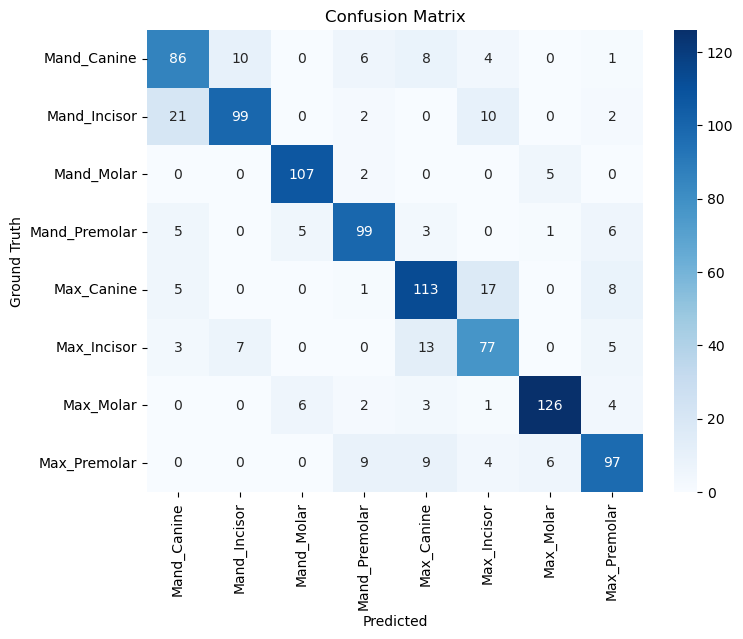

               precision    recall  f1-score   support

  Mand_Canine       0.72      0.75      0.73       115
 Mand_Incisor       0.85      0.74      0.79       134
   Mand_Molar       0.91      0.94      0.92       114
Mand_Premolar       0.82      0.83      0.82       119
   Max_Canine       0.76      0.78      0.77       144
  Max_Incisor       0.68      0.73      0.71       105
    Max_Molar       0.91      0.89      0.90       142
 Max_Premolar       0.79      0.78      0.78       125

     accuracy                           0.81       998
    macro avg       0.80      0.80      0.80       998
 weighted avg       0.81      0.81      0.81       998



In [27]:
plot_cmatrix_creport(test_loader, net, dataset)